In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

/Users/sikhadas/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Analyzing HR Employee Attrition and Performance Data from IBM Watson

### Data Source: 
https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/

### Goal: 
Can we predict employee attrition? Analyze factors that lead to employee attrition. 

### Given Data Definitions:

Education
    - 1 'Below College'
    - 2 'College'
    - 3 'Bachelor'
    - 4 'Master'
    - 5 'Doctor'

EnvironmentSatisfaction	
    - 1 'Low'
	- 2 'Medium'
	- 3 'High'
	- 4 'Very High'
	
JobInvolvement	
    - 1 'Low'
	- 2 'Medium'
	- 3 'High'
	- 4 'Very High'
	
JobSatisfaction	
    - 1 'Low'
	- 2 'Medium'
	- 3 'High'
	- 4 'Very High'
	
PerformanceRating	
    - 1 'Low'
	- 2 'Good'
	- 3 'Excellent'
	- 4 'Outstanding'
	
RelationshipSatisfaction	
    - 1 'Low'
	- 2 'Medium'
	- 3 'High'
	- 4 'Very High'
	
WorkLifeBalance	
    - 1 'Bad'
	- 2 'Good'
	- 3 'Better'
	- 4 'Best'

In [2]:
# read file

employee_attrition = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

### Data Exploration

__First, I will explore the data by understanding the types of features I have to work with and relationships among the features.__

In [3]:
# look at shape, quick view of data

print("full data size: " + str(employee_attrition.shape))
print
print(employee_attrition.head(1))

full data size: (1470, 35)

   Age Attrition BusinessTravel  DailyRate Department  DistanceFromHome  \
0   41       Yes  Travel_Rarely       1102      Sales                 1   

   Education EducationField  EmployeeCount  EmployeeNumber  \
0          2  Life Sciences              1               1   

           ...           RelationshipSatisfaction StandardHours  \
0          ...                                  1            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 0                  8                      0               1   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                  4                        0   

   YearsWithCurrManager  
0                     5  

[1 rows x 35 columns]


In [4]:
# look at data types

print(employee_attrition.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
# variables of interest to explore

# id
id_var = ['EmployeeNumber']

# define the numeric variables
num_vars = ['Age', 'DailyRate', 'DistanceFromHome',
           'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike',
           'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
           'YearsSinceLastPromotion', 'YearsWithCurrManager']
print(str(len(num_vars)) + ' numeric variables')
print

# define the categorical variables
cat_vars = ['BusinessTravel', 'Department',
           'Education', 'EducationField', 'EnvironmentSatisfaction',
           'Gender', 'JobInvolvement', 'JobLevel', 'JobRole',
           'JobSatisfaction', 'MaritalStatus', 'Over18',
           'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
           'StockOptionLevel', 'WorkLifeBalance']

# define the target
target = ['Attrition']

print(str(len(cat_vars)) + ' categorical variables')

12 numeric variables

17 categorical variables


In [6]:
# convert all categorical variables to string

employee_attrition[cat_vars] = employee_attrition[cat_vars].astype('string')

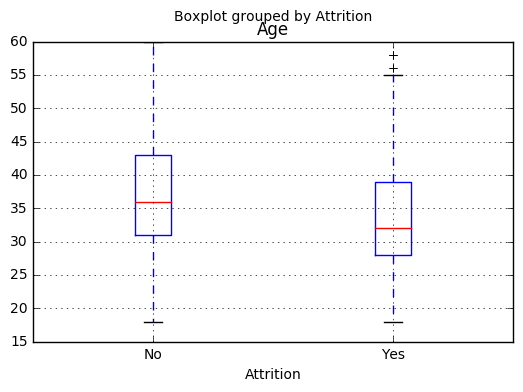

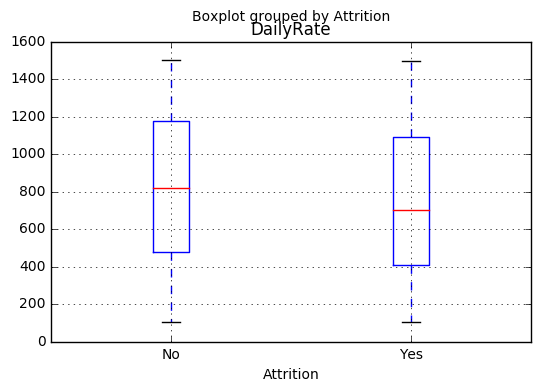

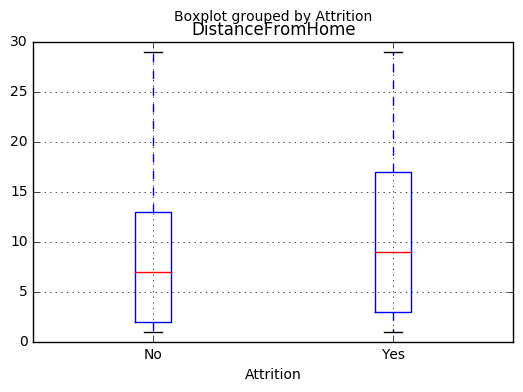

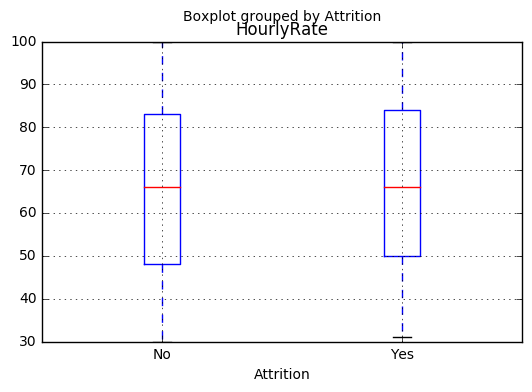

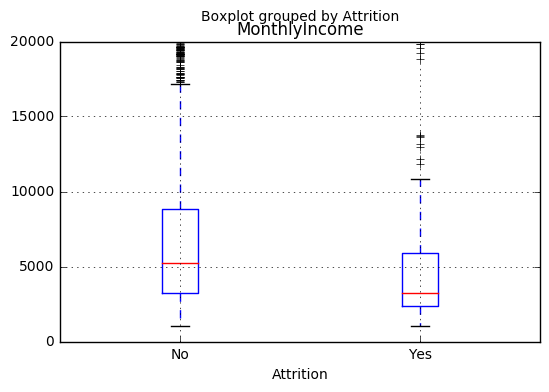

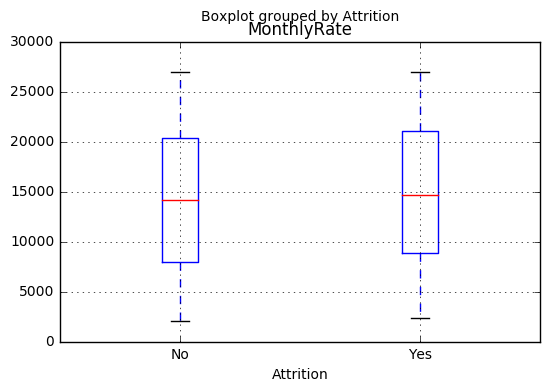

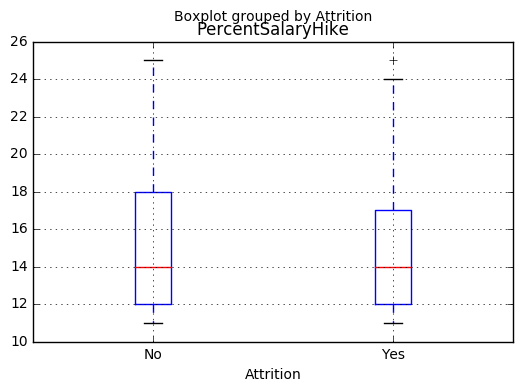

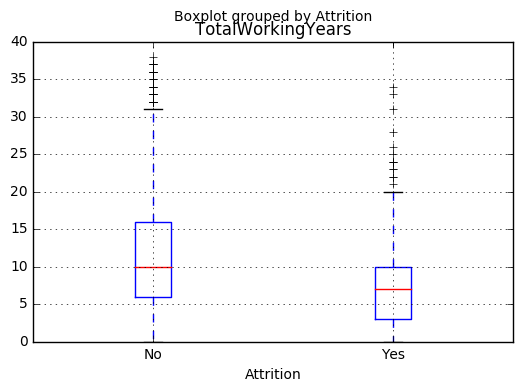

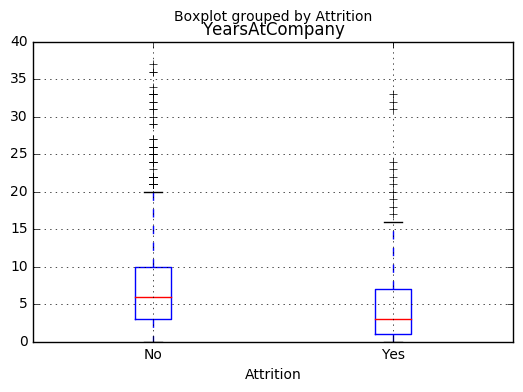

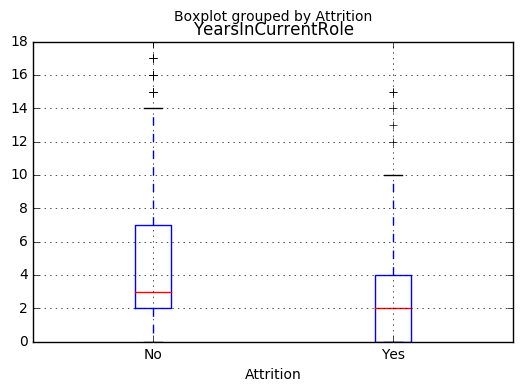

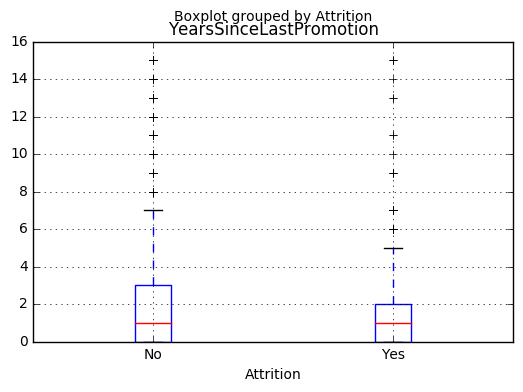

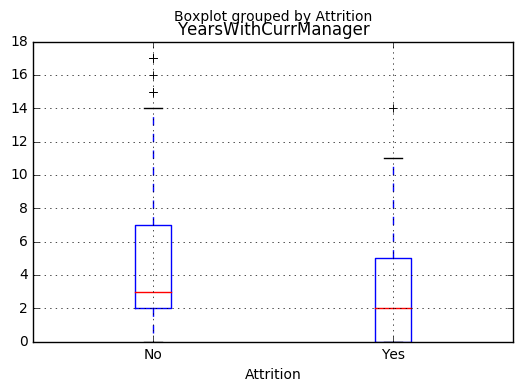

In [7]:
# compare the numeric variables across those who stayed and left the company

for col in num_vars:
    employee_attrition.boxplot(column=col, by='Attrition')
    plt.show()

__Some observations based on the boxplots:__
    - mean age of employees that left company lower
    - mean daily rate of employees that left lower
    - mean distance from home of employees that left higher
    - mean monthly income of employees that left lower
    - mean total working years of employees that left lower
    - mean years at company of employees that left lower
    - mean years in current role of employees that left lower
    - mean years with current manager of employees that left lower

In [8]:
# quick look at how many employees have left a company

employee_attrition['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

__Data is imbalanced, majority have not left a company ('yes').__

In [9]:
# compare the categorical variables across those who stayed and left the company

for col in cat_vars:
    print(col + ":\n")
    print(pd.crosstab(employee_attrition[col],
                      employee_attrition['Attrition']).apply(lambda r: r/r.sum(), axis=1))
    print
    print("----")

BusinessTravel:

Attrition                No       Yes
BusinessTravel                       
Non-Travel         0.920000  0.080000
Travel_Frequently  0.750903  0.249097
Travel_Rarely      0.850431  0.149569

----
Department:

Attrition                     No       Yes
Department                                
Human Resources         0.809524  0.190476
Research & Development  0.861602  0.138398
Sales                   0.793722  0.206278

----
Education:

Attrition        No       Yes
Education                    
1          0.817647  0.182353
2          0.843972  0.156028
3          0.826923  0.173077
4          0.854271  0.145729
5          0.895833  0.104167

----
EducationField:

Attrition               No       Yes
EducationField                      
Human Resources   0.740741  0.259259
Life Sciences     0.853135  0.146865
Marketing         0.779874  0.220126
Medical           0.864224  0.135776
Other             0.865854  0.134146
Technical Degree  0.757576  0.242424

----
Enviro

__Some observations based on the tables:__
    - those that travel frequently have higher % of attrition
    - the lower the education level the higher the % of attrition
    - HR/Technical Degree/Marketing have higher % of attrition
    - least satisfied with environment have higher % of attrition
    - male/female almost equally distributed in % of attrition
    - lower the job involvement, higher the % of attrition
    - lowest job level has the highest % of attrition
    - sales representatives have the highest % of attrition
    - lower the job satisfaction, higher the % of attrition
    - those who are single have higher % of attrition
    - those who work overtime have higher % of attrition
    - difference in performance rating does not show a different in attrition %
    - those with lowest relationship satisfaction have highest % of attrition
    - those with either lowest or highest stock option level have high % of attrition
    - those with the least work life balance have the highest % of attrition
    - all employees are over 18, so this variable is not useful to include

In [10]:
# remove over18

cat_vars.remove('Over18')

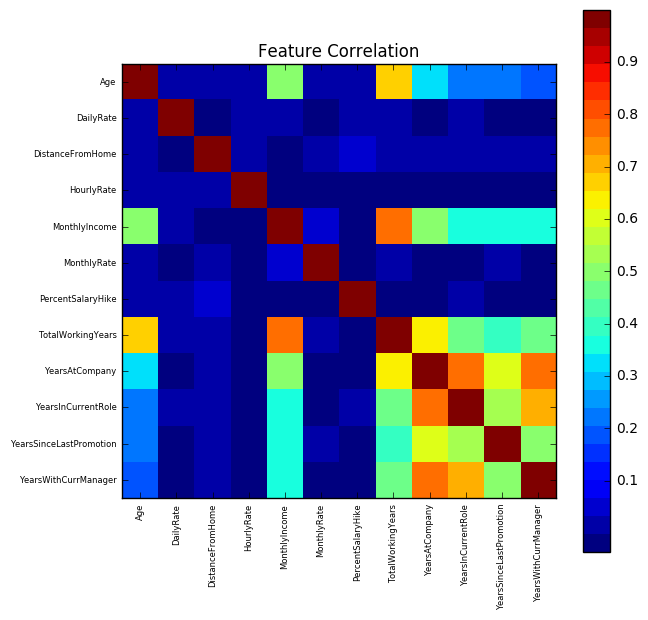

In [11]:
# look at correlations among numeric variables

# source: https://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas
def correlation_matrix(df, num_vars):
    fig, ax1 = plt.subplots(figsize=(7,7))
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    plt.title('Feature Correlation')
    ax1.set_xticks(np.arange(len(num_vars)))
    plt.xticks(rotation=90)
    ax1.set_xticklabels(num_vars,fontsize=6)
    ax1.set_yticks(np.arange(len(num_vars)))
    ax1.set_yticklabels(num_vars,fontsize=6)
    fig.colorbar(cax, ticks=np.arange(0.1, 1.0, step=0.1, dtype=float))
    plt.show()

correlation_matrix(employee_attrition[num_vars], num_vars)

Some observations based on the correlation plot:
    - all the variables with years are moderately correlated, which makes sense
    - age and working years are moderately correlated
    - monthly income and all the variables with years are moderately correlated

### Feature Selection

__My next step is to decide what features to include for my predictive model using 2 different methods:__
    - univariate feature selection
    - tree-based feature selection

In [12]:
# one hot encode the categorical variables

employee_attrition_subset = employee_attrition[num_vars + cat_vars].copy()
employee_attrition_subset = pd.get_dummies(employee_attrition_subset, columns=cat_vars, drop_first=True)
employee_attrition_subset.columns

Index([u'Age', u'DailyRate', u'DistanceFromHome', u'HourlyRate',
       u'MonthlyIncome', u'MonthlyRate', u'PercentSalaryHike',
       u'TotalWorkingYears', u'YearsAtCompany', u'YearsInCurrentRole',
       u'YearsSinceLastPromotion', u'YearsWithCurrManager',
       u'BusinessTravel_Travel_Frequently', u'BusinessTravel_Travel_Rarely',
       u'Department_Research & Development', u'Department_Sales',
       u'Education_2', u'Education_3', u'Education_4', u'Education_5',
       u'EducationField_Life Sciences', u'EducationField_Marketing',
       u'EducationField_Medical', u'EducationField_Other',
       u'EducationField_Technical Degree', u'EnvironmentSatisfaction_2',
       u'EnvironmentSatisfaction_3', u'EnvironmentSatisfaction_4',
       u'Gender_Male', u'JobInvolvement_2', u'JobInvolvement_3',
       u'JobInvolvement_4', u'JobLevel_2', u'JobLevel_3', u'JobLevel_4',
       u'JobLevel_5', u'JobRole_Human Resources',
       u'JobRole_Laboratory Technician', u'JobRole_Manager',
       u'J

In [13]:
# try univariate feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# create and fit selector
selector = SelectKBest(chi2, k=15)
selector.fit(employee_attrition_subset, employee_attrition['Attrition'])

# get ids of columns to keep
cols = selector.get_support(indices=True)

# chosen columns
final_cols = list(employee_attrition_subset.columns[cols])

print(final_cols)

['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'JobLevel_2', 'JobRole_Sales Representative', 'MaritalStatus_Single', 'OverTime_Yes', 'StockOptionLevel_1']


In [14]:
# try tree-based feature selection
# source: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(employee_attrition_subset, employee_attrition['Attrition'])

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# print the feature ranking
print("Feature ranking:\n")

for f in range(employee_attrition_subset.shape[1]):
    print("%s : %f" % (list(employee_attrition_subset.columns)[indices[f]], importances[indices[f]]))

Feature ranking:

OverTime_Yes : 0.063647
Age : 0.034196
MonthlyIncome : 0.032178
YearsAtCompany : 0.031252
TotalWorkingYears : 0.030758
DistanceFromHome : 0.029268
YearsInCurrentRole : 0.028218
HourlyRate : 0.026504
YearsWithCurrManager : 0.026233
PercentSalaryHike : 0.025827
DailyRate : 0.024977
YearsSinceLastPromotion : 0.024762
MonthlyRate : 0.024556
MaritalStatus_Single : 0.024279
WorkLifeBalance_3 : 0.020179
JobSatisfaction_4 : 0.019922
StockOptionLevel_1 : 0.019919
JobInvolvement_3 : 0.019484
JobLevel_2 : 0.019384
RelationshipSatisfaction_3 : 0.019241
BusinessTravel_Travel_Frequently : 0.018685
Gender_Male : 0.017869
EnvironmentSatisfaction_3 : 0.017229
EnvironmentSatisfaction_4 : 0.016998
Education_4 : 0.016584
RelationshipSatisfaction_4 : 0.016373
Education_3 : 0.016038
JobRole_Laboratory Technician : 0.015757
EducationField_Life Sciences : 0.015496
MaritalStatus_Married : 0.015481
EducationField_Medical : 0.015457
WorkLifeBalance_2 : 0.014925
JobSatisfaction_3 : 0.014677
JobI

__These ranked features are very similar to the ones selected with the chi-squared test above, so, I will use the final_cols list going forward.__

### Building Train/Test Sets

__My next step is to create my training and test sets.__

In [15]:
# train/test split for model building

X_train, X_test, y_train, y_test = train_test_split(employee_attrition_subset[final_cols], 
                                                    employee_attrition['Attrition'], test_size=0.3, 
                                                    stratify=employee_attrition['Attrition'], random_state=0)

# use SMOTE for oversampling due to class imbalance

attrition_no_count = y_train.value_counts()['No']

sm = SMOTE(random_state=0, ratio={'No':attrition_no_count, 'Yes':attrition_no_count})
X_train_oversamp, y_train_oversamp = sm.fit_sample(X_train, y_train)

### Model Building / Evaluation

__Approach : try some common classifiers__
    - try a linear model : Logistic Regression
    - try bagging/boosting approaches that help lower variance and bias respectively and 
    tend to give higher accuracies for non-linear data

In [16]:
def reports(model, X_train, y_train, X_test, y_test):
    ''' Create confusion matrix and classification report showing train/test accuracies for model evaluation. '''
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # evaluate train

    print('train:\n')
    y_train_pred = model.predict(X_train_oversamp)
    confusion_mat = confusion_matrix(y_train_oversamp, y_train_pred)

    print(confusion_mat)
    print(classification_report(y_train_oversamp, y_train_pred))
    print('')

    # evaluate test

    print('test:\n')
    y_pred = model.predict(X_test)
    confusion_mat = confusion_matrix(y_test, y_pred)

    print(confusion_mat)
    print(classification_report(y_test, y_pred))

#### Logistic Regression

In [17]:
# tested different C values, however f1-scores did not change or improve drastically

logreg = LogisticRegression(random_state=0, C=0.9, solver='liblinear')
logreg.fit(X_train_oversamp, y_train_oversamp)

reports(logreg, X_train_oversamp, y_train_oversamp, X_test, y_test)

train:

[[633 230]
 [200 663]]
             precision    recall  f1-score   support

         No       0.76      0.73      0.75       863
        Yes       0.74      0.77      0.76       863

avg / total       0.75      0.75      0.75      1726


test:

[[279  91]
 [ 26  45]]
             precision    recall  f1-score   support

         No       0.91      0.75      0.83       370
        Yes       0.33      0.63      0.43        71

avg / total       0.82      0.73      0.76       441



#### Gradient Boosting

In [18]:
# tested different parameters values, however f1-scores did not change or improve drastically

gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, max_features=3,
                                min_samples_leaf=0.1, min_samples_split=0.5,
                                n_estimators=50, subsample=0.9)
    
gb.fit(X_train_oversamp, y_train_oversamp)

reports(gb, X_train_oversamp, y_train_oversamp, X_test, y_test)

train:

[[764  99]
 [132 731]]
             precision    recall  f1-score   support

         No       0.85      0.89      0.87       863
        Yes       0.88      0.85      0.86       863

avg / total       0.87      0.87      0.87      1726


test:

[[327  43]
 [ 40  31]]
             precision    recall  f1-score   support

         No       0.89      0.88      0.89       370
        Yes       0.42      0.44      0.43        71

avg / total       0.82      0.81      0.81       441



#### Random Forest

In [19]:
# tested different parameters values, however f1-scores did not change or improve drastically

rf = RandomForestClassifier(bootstrap=True,
                            max_depth=3,
                            max_features=2,
                            min_samples_leaf=2,
                            min_samples_split=2,
                            n_estimators=50, random_state=0)

rf.fit(X_train_oversamp, y_train_oversamp)

reports(rf, X_train_oversamp, y_train_oversamp, X_test, y_test)

train:

[[758 105]
 [137 726]]
             precision    recall  f1-score   support

         No       0.85      0.88      0.86       863
        Yes       0.87      0.84      0.86       863

avg / total       0.86      0.86      0.86      1726


test:

[[321  49]
 [ 40  31]]
             precision    recall  f1-score   support

         No       0.89      0.87      0.88       370
        Yes       0.39      0.44      0.41        71

avg / total       0.81      0.80      0.80       441



### Conclusions

In this scenario, we would like to be able to predict well employees who will leave the company ('attrition = yes'). Thus, we are concerned with having false negatives, which are employees that have been wrongly classified as those who will stay with the company. Thus, we are interested in maximizing recall for our "yes" class. __Among the three models, Logistic Regression has the highest recall for the 'yes' class, so I would use this model to predict employee attrition. In addition, the chosen features do a moderately good job of explaining the target class.__

__As we saw earlier, the following variables are shown to be important factors in determining whether an employee will leave the company or not:__
    - Age 
    - DailyRate
    - DistanceFromHome
    - MonthlyIncome
    - MonthlyRate
    - TotalWorkingYears
    - YearsAtCompany
    - YearsInCurrentRole
    - YearsWithCurrManager
    - BusinessTravel_Travel_Frequently
    - JobLevel_2
    - JobRole_Sales Representative
    - MaritalStatus_Single
    - OverTime_Yes
    - StockOptionLevel_1

We will visualize some of these variables further in Tableau.